In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# Read the data
data = pd.read_csv('day.csv')

In [111]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Data Type for all columns seems fine except for the dteday column, should be datetime.
- Also, it seems there are no null values in any columns 

In [113]:
data['dteday'] = pd.to_datetime(data['dteday'])

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [115]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- This is verified that there are no null values is any columns

- Here 'cnt' is our target (Dependent variable) and the others are the predictors (Independent Variables).
- Since the target variable is a continuous variable, we will be using a **Linear Regression model**. 

Before Proceeding Further we will try to consult the Data-Dictionary provided and try to drop some columns in case they seem un-necessary for creating the model.

- Since Instant is nothing but the Record Index, we can drop this column


In [116]:
data.drop(['instant'], axis = 1,inplace = True)

In [117]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [118]:
(data['casual'] + data['registered'] == data['cnt']).value_counts()

True    730
dtype: int64

- We see that cnt is nothing but the sum of count of casual users and the count of registered users.
- Since they add no new value to the data, we will drop these columns

In [119]:
data.drop(columns = ['casual','registered'],axis = 1, inplace = True)

In [120]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Seasons column




In [121]:
data['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [122]:
data['season'] = data['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [123]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,Spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,Spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,Spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,Spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,Spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Mnth Column

In [124]:
import calendar

In [125]:
data['mnth'] = data['mnth'].apply(lambda x: calendar.month_abbr[x])

In [126]:
data['mnth'].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

### weekday Column

In [127]:
data['weekday'] = data['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [128]:
data['weekday'].value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thrusday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

### weathersit column

In [129]:
data['weathersit'] = data['weathersit'].map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'}) 

In [130]:
data['weathersit'].value_counts()

Clear                463
Mist & Cloudy        246
Light Snow & Rain     21
Name: weathersit, dtype: int64

In [131]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Analysing the Continuous Independent variable against the Dependent variable

In [132]:
cont_var = ['cnt','atemp','temp','hum','windspeed']

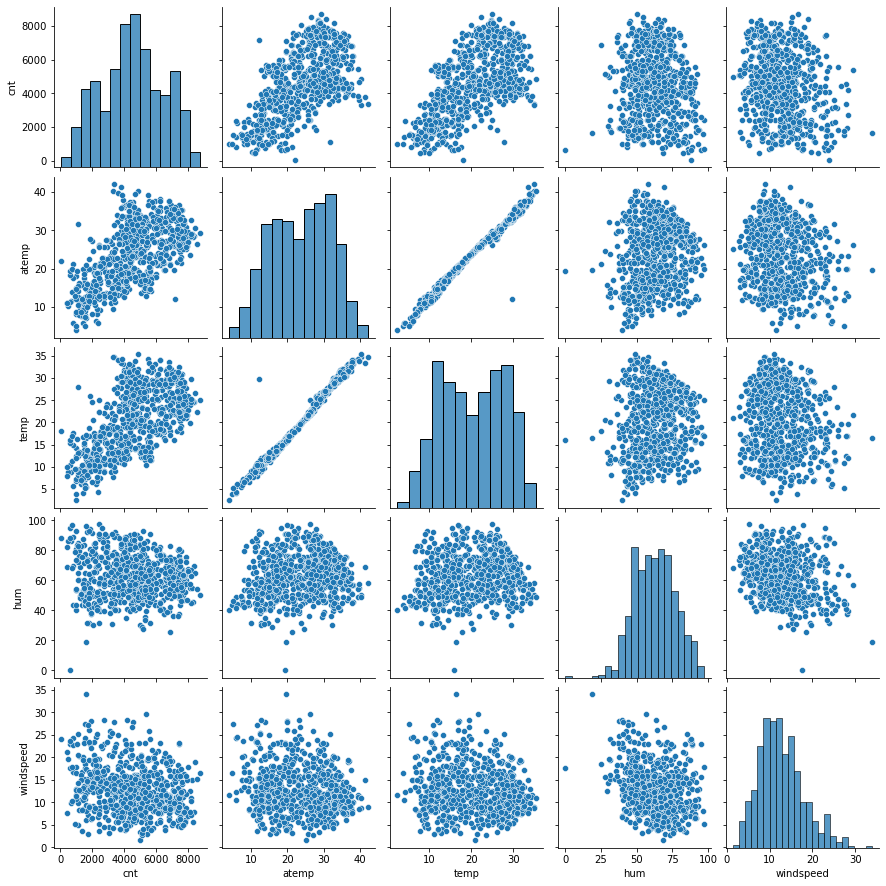

In [133]:
sns.pairplot(data = data,vars = cont_var)
plt.show()

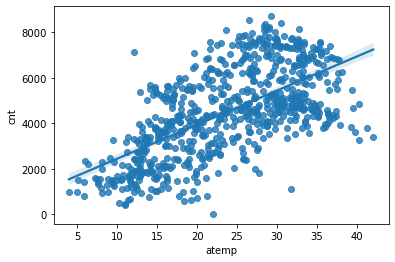

In [134]:
sns.regplot(x = 'atemp',y = 'cnt',data = data)

plt.show()

'atemp' show a positive Linear trend with cnt

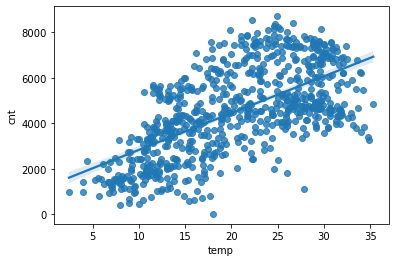

In [135]:
sns.regplot(x = 'temp',y = 'cnt',data = data)

plt.show()

'temp' show a positive Linear trend with cnt

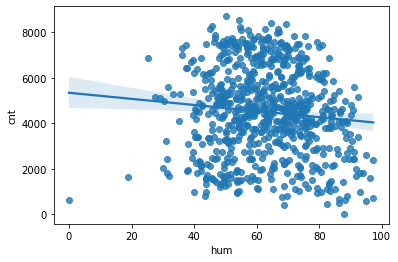

In [136]:
sns.regplot(x = 'hum',y = 'cnt',data = data)

plt.show()

- Hum values seems scattered
- We see a decreasing trend for 'Hum' with 'cnt'

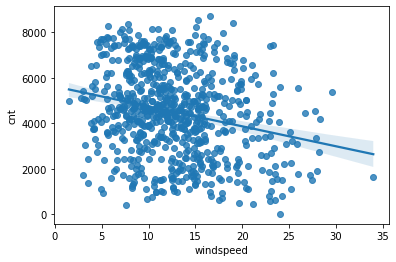

In [137]:
sns.regplot(x = 'windspeed',y = 'cnt',data = data)

plt.show()

- windspeed values seems scattered
- We see a decreasing trend for 'windspeed' with 'cnt'

## Analysing the Categorical Independent variable against the Dependent variable

In [138]:
cat_var = ['season','mnth','yr','holiday','weekday','weathersit','workingday']

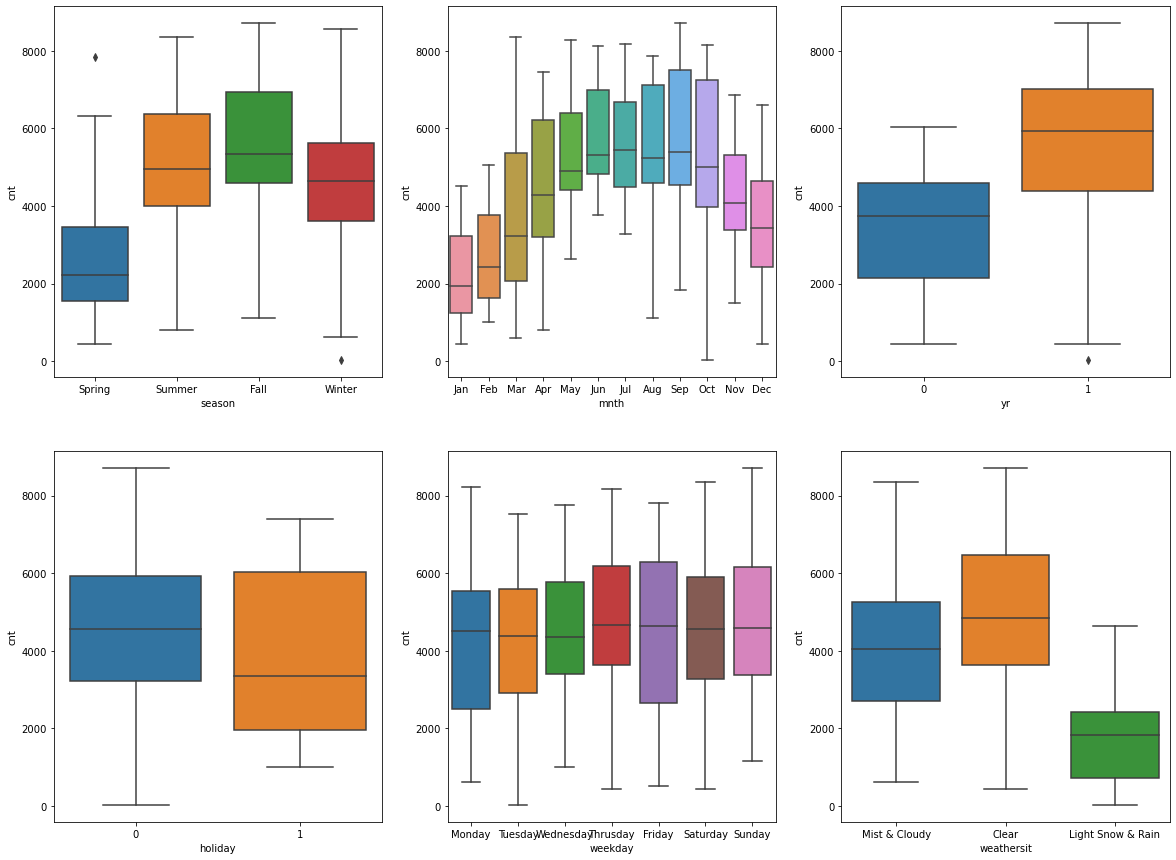

In [139]:
plt.figure(figsize=(20, 15))

for i in range(6):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = cat_var[i], y = 'cnt', data = data)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

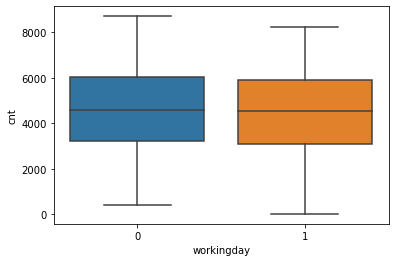

In [140]:
sns.boxplot(x = 'workingday', y = 'cnt', data = data)

- Fall Season has higher count of rentals whereas spring has the least count of rentals
- Friday sees a higher count of rentals compared to other days of the week
- Clear weather situation sees the maximum rentals
- September has the highest number of rentals whereas December has the least count of rentals
- 2019 sees a higher count of rentals than 2018

### Creating Dummy variable for Categorical Data using One Hot Encoding

In [141]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [142]:
dummy = data[['season','mnth','weekday','weathersit']]

In [143]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [144]:
data = pd.concat([data,dummy], axis = 1)

In [145]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,2018-01-01,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,1
1,2018-02-01,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,...,0,0,0,0,0,0,1,0,0,1
2,2018-03-01,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,...,0,0,0,0,0,0,0,1,0,0
3,2018-04-01,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,...,0,0,0,0,0,1,0,0,0,0
4,2018-05-01,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,0


Now, as the dummy variable are created, we will drop the original columns for whic encoding was done from the dataset

In [146]:
data.drop(['season','mnth','weekday','weathersit'],axis = 1,inplace = True)

In [147]:
data.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,1
1,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,1
2,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [148]:
data.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [149]:
data.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,1
1,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,1
2,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


We see that the aspects of the day column are logically well captured by some other columns such as mnth,weeday,yr and so on. So it will be better if we can drop the dteday column as it seems redundant.

In [150]:
data.drop(columns = ['dteday'],axis = 1,inplace = True)

In [151]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Split the data into Training and Testing sets

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
train, test = train_test_split(data, train_size = 0.7,test_size  =0.3,random_state = 100)

In [154]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- From here we see that some continuous features are in different scales
- We will try to scale those features using MinMax Normalization

## Scaling the features in the train dataset

In [155]:
to_scale = ['temp','hum','windspeed','cnt','atemp']

In [156]:
from sklearn.preprocessing import MinMaxScaler

In [157]:
scaler = MinMaxScaler()

In [158]:
train[to_scale] = scaler.fit_transform(train[to_scale])

C:\Users\saura\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [159]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 Now we see that the features have been successfully scaled

<AxesSubplot:>

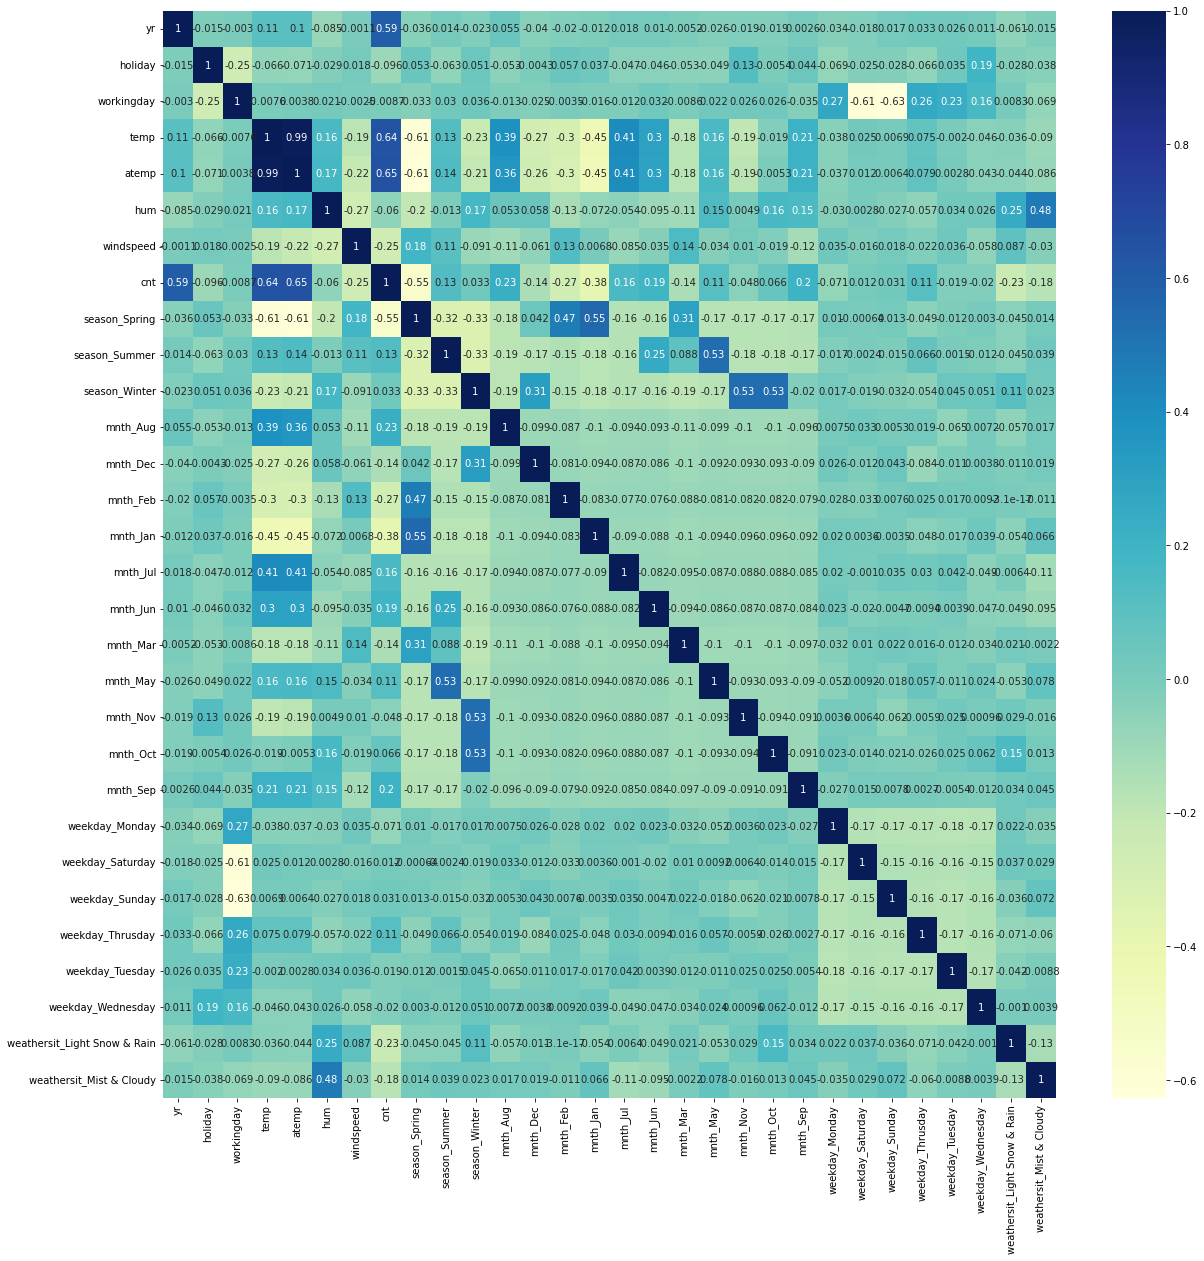

In [160]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")

### Creating our X_train and y_train

In [161]:
y_train = train.pop('cnt')
X_train = train

## Model Creation

- We will be using the statsmodels library to create the **Linear Regression** model due to its advantage of providing a wide array of statistical summary.

- Since statsmodels will try to fit a line through origin by default, we will have to explictily add a constant to the X_train data.

- We will be using the bottom up approach where we will be using all features and eliminating them one by one to reach to a point where we have the optimal no. of features available to potray our model.

- We will be initially using the Recursive Feature Elimination approach to get the top 13 favourable features. 

### Corase Tuning by using RFE

In [162]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [163]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [164]:
rfe = RFE(lm,n_features_to_select=13)
rfe = rfe.fit(X_train,y_train)

In [165]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', False, 6),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 15),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [166]:
# Columns suggested by RFE as favourable features
col = X_train.columns[rfe.support_]

In [167]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [168]:
X_train_rfe = X_train[col]

In [169]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,1


In [170]:
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\saura\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [171]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,1


In [172]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [173]:
lm.params

const                           0.295720
yr                              0.230076
holiday                        -0.096813
temp                            0.512685
hum                            -0.166542
windspeed                      -0.187088
season_Spring                  -0.051791
season_Summer                   0.049088
season_Winter                   0.093078
mnth_Jan                       -0.033102
mnth_Jul                       -0.055924
mnth_Sep                        0.082481
weathersit_Light Snow & Rain   -0.240539
weathersit_Mist & Cloudy       -0.054123
dtype: float64

In [174]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.45e-190
Time:                        14:18:31   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Dropping mnth_jan as the p-value is quiet high thus proving the null hypothesis correct - coeff is not significant

In [175]:
X_train_rfe.drop(columns = ['mnth_Jan'],axis = 1,inplace = True)

### Retraining the Model with the updated features

In [176]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()

In [177]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.69e-190
Time:                        14:18:35   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Fine Tuning using manual elimination

In [178]:
# Calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.38
6,season_Spring,5.02
3,temp,3.61
8,season_Winter,3.49
7,season_Summer,2.61
4,hum,1.90
12,weathersit_Mist & Cloudy,1.56
9,mnth_Jul,1.48
10,mnth_Sep,1.30
11,weathersit_Light Snow & Rain,1.24


In [179]:
X_train_rfe.drop(columns = ['season_Spring'],axis = 1,inplace = True)

In [180]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()

In [181]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.89e-190
Time:                        14:18:36   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [182]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
4,hum,1.87
3,temp,1.60
11,weathersit_Mist & Cloudy,1.55
8,mnth_Jul,1.43
6,season_Summer,1.33
7,season_Winter,1.29
10,weathersit_Light Snow & Rain,1.24
9,mnth_Sep,1.19
5,windspeed,1.18


- We see almost all P Values and VIF look fine except for the VIF for constant, which is quiet high
- Still, we will not be eliminating the const as it will make no difference since it is not a predictor variable 

### Residual Analysis of Train Data

In [183]:
y_train_pred = lm2.predict(X_train_rfe)

In [184]:
res = y_train - y_train_pred

C:\Users\saura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

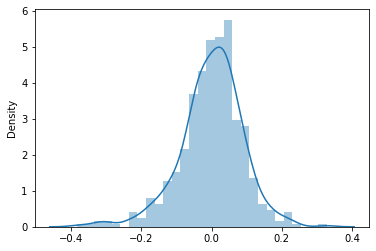

In [185]:
sns.distplot(res)

We see the assumption  holds correct as the residuals are Normally Distributed about mean = 0

### Making Prediction for the Test dataset

#### Applying scaling to the test dataset

In [186]:
test[to_scale] = scaler.transform(test[to_scale])

C:\Users\saura\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [187]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [188]:
y_test = test.pop('cnt')

In [189]:
X_test = test

In [190]:
X_test_sm = sm.add_constant(X_test)

C:\Users\saura\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [191]:
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,1,0,0,0,0,0,0


In [194]:
col = X_train_rfe.columns

In [196]:
X_test_sm = X_test_sm[col] 

In [197]:
y_test_pred = lm2.predict(X_test_sm)

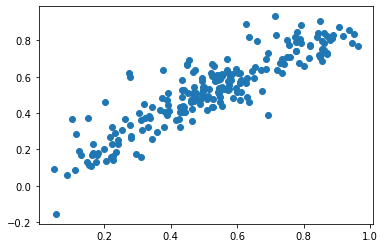

In [198]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)

We see a linearity between **y_test** and **y_test_pred**

In [201]:
lm2.params

const                           0.225733
yr                              0.227942
holiday                        -0.099419
temp                            0.597751
hum                            -0.182550
windspeed                      -0.189202
season_Summer                   0.080346
season_Winter                   0.135725
mnth_Jul                       -0.048116
mnth_Sep                        0.095936
weathersit_Light Snow & Rain   -0.233145
weathersit_Mist & Cloudy       -0.051698
dtype: float64

Equation of our best fitted line is:

cnt = 0.225733 + 0.227942 X yr - 0.099419 X holiday + 0.597751 X temp - 0.182550 X hum - 0.189202 X windspeed +  0.080346 X season_Summer +  0.135725 X season_Winter - 0.048116 X mnth_Jul +  0.095936 X mnth_Sep - 0.233145 X weathersit_Light Snow & Rain  - 0.051698 X weathersit_Mist & Cloudy 

**All the positive coefficients indicate that an increase in these values will lead to an increase in the value of cnt.**
  
**All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.**


- Temp is the most significant with the largest coefficient
- The renatls see a dip during the holidays
- Month of July sees a negative impact whereas Sept sees a positive impact on the count of bikes rented
- Humidity and windspeed adversely affects the count